# Assignment 7

## Find a single-humped dataset on the Web. The most original datasets will get a bonus. Compute the histogram, and make it look pretty.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("Korean_demographics_2000-2022.csv")
data

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2
...,...,...,...,...,...,...,...,...,...,...,...,...
4855,6/1/2022,Jeollanam-do,565.0,3.80,1369.0,9.1,299.0,2.0,479.0,3.2,-805.0,-5.4
4856,6/1/2022,Sejong,248.0,7.90,106.0,3.4,43.0,1.4,123.0,3.9,141.0,4.5
4857,6/1/2022,Seoul,3137.0,4.10,3631.0,4.7,1088.0,1.4,2630.0,3.4,-494.0,-0.6
4858,6/1/2022,Ulsan,443.0,4.80,434.0,4.7,154.0,1.7,316.0,3.5,9.0,0.1


In [3]:
data = data.Marriage_rate
data.fillna(value = data.mean(), inplace=True)
data

0       7.5
1       6.6
2       6.5
3       7.4
4       7.5
       ... 
4855    3.2
4856    3.9
4857    3.4
4858    3.5
4859    3.5
Name: Marriage_rate, Length: 4860, dtype: float64

Here is the histogram of Marriage_rate of Korean_demographics_2000-2022

<AxesSubplot:>

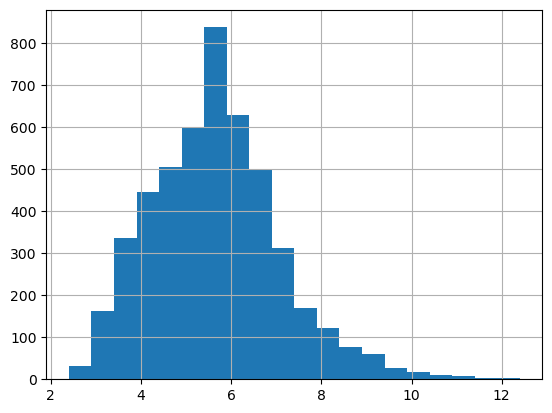

In [4]:
data.hist(bins=20)

## Figure out the best possible match using MLE to find the best parameters.

In [5]:
from scipy.special import psi, polygamma

# Note that log_mean and mean_log are parameters of the dlgamma function
dlgamma = lambda m, log_mean, mean_log: np.log(m) - psi(m) - log_mean + mean_log
dl2gamma = lambda m, *args: 1./m - polygamma(1, m)

In [6]:
data.mean()

5.608451900615842

In [7]:
import numpy as np

where `log_mean` and `mean_log` are $\log{\bar{x}}$ and $\overline{\log(x)}$, respectively.

In [8]:
# Calculate statistics
log_mean = np.log(data.mean())
mean_log = data.apply(np.log).mean()
log_mean, mean_log

(1.7242747279080064, 1.6915311684117877)

In [9]:
# Alpha MLE for Dataset
from scipy.optimize import newton
alpha_mle = newton(dlgamma, 2, dl2gamma, args=(log_mean, mean_log))
alpha_mle

15.434996448584126

In [10]:
# Beta MLE for Dataset
beta_mle = data.mean()/alpha_mle
beta_mle

0.3633594552028752

Let's plot the model

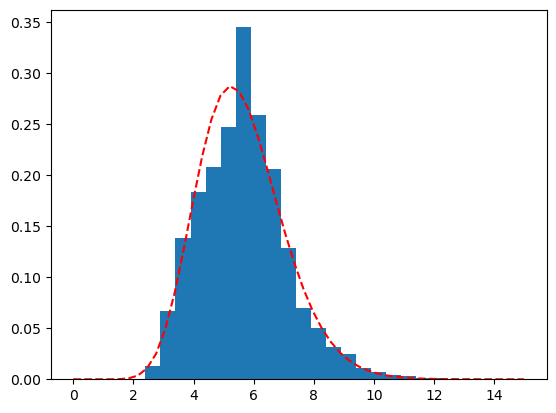

In [11]:
from scipy.stats.distributions import gamma

data.hist(density=True, bins=20, grid=False)
x = np.linspace(0, 15)
plt.plot(x, gamma.pdf(x, a = alpha_mle, scale = beta_mle), 'r--')

## Now, repeat the experiment with Bayesian simulation using PyMC3.

We use normal distribution to model parameter alpha

In [12]:
from pymc3 import Model, Uniform, Normal, Gamma

with Model() as data_model:
    alpha = Normal('alpha', alpha_mle, sd=10)


You can find the C code in this temporary file: /var/folders/06/vtkypm6s2vggv926_2kl6l8r0000gn/T/theano_compilation_error_08b_wm32
library imit=] is not found.


Exception: ('Compilation failed (return status=1): In file included from /Users/muhenan/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.8.13-64/tmp70kuagnu/mod.cpp:1:. /Users/muhenan/opt/anaconda3/envs/cv2/include/python3.8/Python.h:14:2: error: "Something\'s broken.  UCHAR_MAX should be defined in limits.h.". #error "Something\'s broken.  UCHAR_MAX should be defined in limits.h.".  ^. /Users/muhenan/opt/anaconda3/envs/cv2/include/python3.8/Python.h:18:2: error: "Python\'s source code assumes C\'s unsigned char is an 8-bit type.". #error "Python\'s source code assumes C\'s unsigned char is an 8-bit type.".  ^. /Users/muhenan/opt/anaconda3/envs/cv2/include/python3.8/Python.h:27:5: error: "Python.h requires that stdio.h define NULL.". #   error "Python.h requires that stdio.h define NULL.".     ^. In file included from /Users/muhenan/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.8.13-64/tmp70kuagnu/mod.cpp:1:. In file included from /Users/muhenan/opt/anaconda3/envs/cv2/include/python3.8/Python.h:30:. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:73:64: error: use of undeclared identifier \'strchr\'. char* __libcpp_strchr(const char* __s, int __c) {return (char*)strchr(__s, __c);}.                                                                ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:80:75: error: use of undeclared identifier \'strpbrk\'. char* __libcpp_strpbrk(const char* __s1, const char* __s2) {return (char*)strpbrk(__s1, __s2);}.                                                                           ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:87:65: error: use of undeclared identifier \'strrchr\'; did you mean \'strchr\'?. char* __libcpp_strrchr(const char* __s, int __c) {return (char*)strrchr(__s, __c);}.                                                                 ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:75:13: note: \'strchr\' declared here. const char* strchr(const char* __s, int __c) {return __libcpp_strchr(__s, __c);}.             ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:94:49: error: unknown type name \'size_t\'. void* __libcpp_memchr(const void* __s, int __c, size_t __n) {return (void*)memchr(__s, __c, __n);}.                                                 ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:96:46: error: unknown type name \'size_t\'. const void* memchr(const void* __s, int __c, size_t __n) {return __libcpp_memchr(__s, __c, __n);}.                                              ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:98:46: error: unknown type name \'size_t\'.       void* memchr(      void* __s, int __c, size_t __n) {return __libcpp_memchr(__s, __c, __n);}.                                              ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:101:74: error: use of undeclared identifier \'strstr\'; did you mean \'strchr\'?. char* __libcpp_strstr(const char* __s1, const char* __s2) {return (char*)strstr(__s1, __s2);}.                                                                          ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:77:13: note: \'strchr\' declared here.       char* strchr(      char* __s, int __c) {return __libcpp_strchr(__s, __c);}.             ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:101:74: error: no matching function for call to \'strchr\'. char* __libcpp_strstr(const char* __s1, const char* __s2) {return (char*)strstr(__s1, __s2);}.                                                                          ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:77:13: note: candidate disabled: <no message provided>.       char* strchr(      char* __s, int __c) {return __libcpp_strchr(__s, __c);}.             ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:101:81: error: cannot initialize a parameter of type \'char *\' with an lvalue of type \'const char *\'. char* __libcpp_strstr(const char* __s1, const char* __s2) {return (char*)strstr(__s1, __s2);}.                                                                                 ^~~~. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/string.h:77:32: note: passing argument to parameter \'__s\' here.       char* strchr(      char* __s, int __c) {return __libcpp_strchr(__s, __c);}.                                ^. In file included from /Users/muhenan/.theano/compiledir_macOS-10.16-x86_64-i386-64bit-i386-3.8.13-64/tmp70kuagnu/mod.cpp:1:. In file included from /Users/muhenan/opt/anaconda3/envs/cv2/include/python3.8/Python.h:34:. In file included from /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/stdlib.h:100:. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/math.h:773:12: error: no member named \'labs\' in the global namespace; did you mean \'abs\'?.   return ::labs(__x);.          ~~^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/math.h:772:39: note: \'abs\' declared here. inline _LIBCPP_INLINE_VISIBILITY long abs(long __x) _NOEXCEPT {.                                       ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/math.h:777:12: error: no member named \'llabs\' in the global namespace.   return ::llabs(__x);.          ~~^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/math.h:785:12: error: no member named \'fabsf\' in the global namespace.   return ::fabsf(__lcpp_x);.          ~~^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/math.h:789:12: error: no member named \'fabs\' in the global namespace; did you mean \'abs\'?.   return ::fabs(__lcpp_x);.          ~~^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/math.h:772:39: note: \'abs\' declared here. inline _LIBCPP_INLINE_VISIBILITY long abs(long __x) _NOEXCEPT {.                                       ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/math.h:794:12: error: no member named \'fabsl\' in the global namespace.   return ::fabsl(__lcpp_x);.          ~~^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/math.h:808:34: error: unknown type name \'ldiv_t\'. inline _LIBCPP_INLINE_VISIBILITY ldiv_t div(long __x, long __y) _NOEXCEPT {.                                  ^. /Users/muhenan/opt/anaconda3/bin/../include/c++/v1/math.h:809:12: error: no member named \'ldiv\' in the global namespace.   return ::ldiv(__x, __y);.          ~~^. fatal error: too many errors emitted, stopping now [-ferror-limit=]. 20 errors generated.. ', 'FunctionGraph(Elemwise{true_div,no_inplace}(TensorConstant{1.0}, TensorConstant{0.01}))')

And we use normal distribution to model parameter beta

In [188]:
with data_model:
    beta = Normal('beta', beta_mle, sd=10)

Now go ahead and model our dataset in pymc3:

In [189]:
with data_model:
    data_like = Gamma('data_like', alpha = alpha_mle, beta = beta_mle, observed=data)

Fit the model

In [190]:
from pymc3 import fit
import seaborn as sns
sns.set_context('notebook')
RANDOM_SEED = 20090425

with data_model: 
    data_trace = fit(random_seed=RANDOM_SEED).sample(1000)

Finished [100%]: Average Loss = 95,294


Now plot all the distributions

/Users/muhenan/opt/anaconda3/envs/cv2/lib/python3.8/site-packages/arviz/data/io_pymc3.py:96: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  warnings.warn(


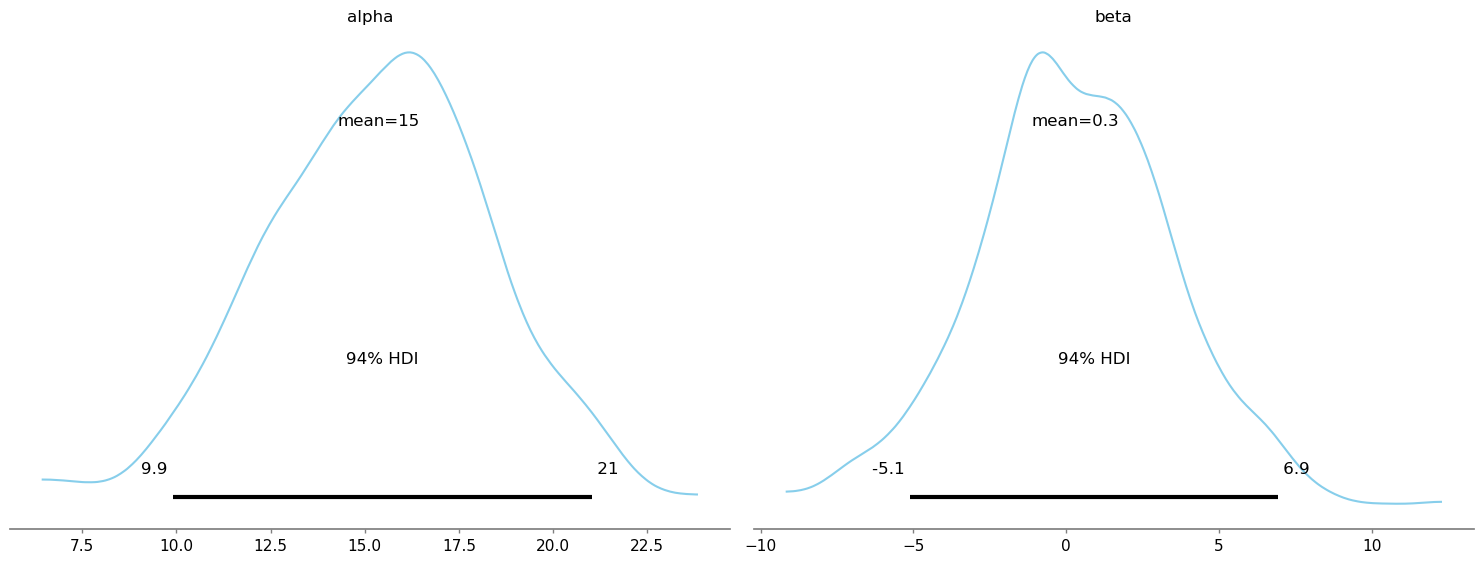

In [191]:
from pymc3 import plot_posterior

plot_posterior(data_trace[100:],
                var_names=['alpha', 'beta'],
                color='#87ceeb');

## Which method is more correct, and which was the most fun?

The bayesian simulation using PyMC3 seems more correct to us because of the accuracy in the simulated plots, Using MLE was pretty fun because of the histograms, But overall we figured both the simulations together and had fun doing this assignment.